In [43]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


In [45]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [47]:
#Build a new model for CNNs
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.summary()

In [48]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [49]:
model.fit(x=x_train,y=y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 416s 7ms/step - loss: 0.2093 - acc: 0.9370


In [50]:
model.evaluate(x_test, y_test)

   64/10000 [..............................] - ETA: 24s

C:\Users\ahmed\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


10000/10000 [==============================] - 27s 3ms/step


[0.08377207876872271, 0.9745]

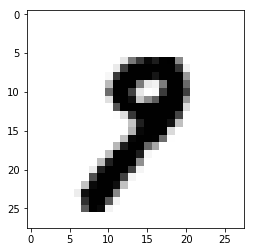

In [56]:
index=73

import matplotlib.pyplot as plt
plt.imshow(x_test[index].reshape(28, 28),cmap='Greys')

In [57]:
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print(pred.argmax())

9


In [58]:
#Save the model
model.save('saved_model.h5')


In [59]:
#Load the model
from keras.models import load_model
new_model = load_model('saved_model.h5')


In [ ]:
#Save weights
print(new_model.get_weights())
model.save_weights('my_model_weights.h5')
model2.load_weights('my_model_weights.h5')


In [ ]:
# model validation
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(x=x_train,y=y_train, epochs=1)
#model.fit(x=x_train,y=y_train, epochs=1, validation_split=0.3)

#early stopping
#model.fit(x=x_train,y=y_train, epochs=1, validation_split=0.3)
#model.fit(x=x_train,y=y_train, epochs=1, validation_split=0.3, callbacks = [early_stopping_monitor])